<a href="https://colab.research.google.com/github/MagdaSousa/Estatistica/blob/main/Correla%C3%A7%C3%A3o_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Informações sobre o conjunto de dados obtido do site Kaggle: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction  
Dados relacionados a empresa automobilística chinesa Geely Auto.
Eles contrataram uma empresa de consultoria automobilística para entender os fatores dos quais depende o preço dos carros.

In [2]:
import pandas as pd
cars= pd.read_csv("https://gist.githubusercontent.com/MagdaSousa/7e8ecd01e1783b7ab88678c0298b6b6a/raw/c88620d1ee27cd8d6b37f18ccd8aa6d633ed7686/fonte%2520:%2520Kaggle")

In [3]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price\t
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Nesse momento irei aplicar os conceitos de correlação linear para verificar se há correlação entre entre a potência do motor e o preço do carro. Neste caso usarei somente essas duas colunas, pois tratarei apenas de uma correlação univariada, então utilizarei somente a variavel relacionada a potência do motor para verificar se ela explica o preço

Separando as colunas que irei analisar:

In [4]:
potencia_do_motor=cars[['horsepower','price\t']]
potencia_do_motor.head()

,horsepower,price\t
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0


Gerando um gráfico de dispersão para tentar identificar uma tendência que depois terei que comprovar estatísticamente:

Analisando a olho, identifico uma correlação positiva, onde conforme a potência do motor aumenta o preço também aumenta

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


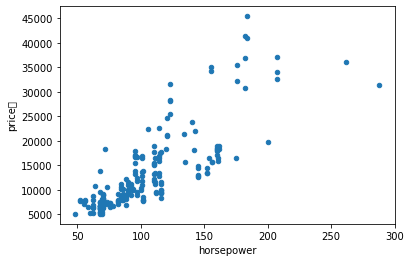

In [5]:
potencia_do_motor.plot.scatter(x='horsepower',y='price\t')

# Comprovando  se a correlação é verdadeira.  
obs. como o objetivo é demonstrar o aprendizado farei o calculo "manualmente" e também em python, para comparar os valores

**Passo 1** organizar a tabela para obter os valores para a correlação de pearson:   
Obtrendo os valores de x,y, v2 e x2 para preencher a fórmula

In [41]:
potencia_do_motor['x.y']=potencia_do_motor['horsepower'] * potencia_do_motor['price\t']
potencia_do_motor['x2']=potencia_do_motor['horsepower'] **2
potencia_do_motor['y2']= potencia_do_motor['price\t'] **2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [7]:
potencia_do_motor.head()

,horsepower,price\t,x.y,x2,y2
0,111,13495.0,1497945.0,12321,182115025.0
1,111,16500.0,1831500.0,12321,272250000.0
2,154,16500.0,2541000.0,23716,272250000.0
3,102,13950.0,1422900.0,10404,194602500.0
4,115,17450.0,2006750.0,13225,304502500.0


**Passo 2:** Obtendo o somatório:

In [8]:
somatorio_x = potencia_do_motor['horsepower'].sum()
somatorio_y = potencia_do_motor['price\t'].sum()
somatorio_xy = potencia_do_motor['x.y'].sum()
somatorio_x2 = potencia_do_motor['x2'].sum()
somatorio_y2 = potencia_do_motor['y2'].sum()
n=potencia_do_motor['horsepower'].count()

print(f" somatorio_x:{somatorio_x} \n somatorio_y:{somatorio_y}\n somatorio_xy :{somatorio_xy}\n somatorio_x2:{somatorio_x2} \n somatorio_y2:{somatorio_y2} \n n:{n} ")

 somatorio_x:21344 
 somatorio_y:2721725.667
 somatorio_xy :335459547.72
 somatorio_x2:2541278 
 somatorio_y2:49155203295.68389 
 n:205 


**Passo 3:** De posse dos somatórios, agora irei aplicar as fórmulas

# Coeficiente de correlação de Pearson


Interpretando :  
0.9 para mais ou para menos indica uma correlação muito forte.  
0.7 a 0.9 positivo ou negativo indica uma correlação forte.  
0.5 a 0.7 positivo ou negativo indica uma correlação moderada.  
0.3 a 0.5 positivo ou negativo indica uma correlação fraca.  
0 a 0.3 positivo ou negativo indica uma correlação desprezível.  

Neste caso obtivemos um valor positivo próximo a 1, o que indica uma correlação positiva forte entre a quantidade de cavalos de potencia e o preço de vendo do automóvel, comprovando a tendencia demonstrada no gráfico de dispersão..

**Passo 4:** Realizando o somatório, para obter os valores de Sxx,Syy e Sxy, que são componentes para obter o valor da correlação (R)

In [9]:
Sxx=somatorio_x2 -((somatorio_x **2)/n)
Syy=somatorio_y2 -((somatorio_y **2)/n)
Sxy=somatorio_xy -((somatorio_x * somatorio_y) /n)

print(f" Sxx -> {Sxx}\n Syy -> {Syy}\n Sxy -> {Sxy}\n")

 Sxx -> 319003.1902439026
 Syy -> 13019639361.993187
 Sxy -> 52081437.29830247



**Passo 5:**Obtendo a correlação

In [10]:
import math
R=Sxy/math.sqrt(Sxx * Syy)
R

0.8081388225362219

Fazendo o mesmo calculo só que com uma função pronta da bibliotreca do python. Como podemos verificar a exatidão tanto do calculo "manual" acima e o feito pela função corr do pandas na linguagem python....

In [11]:
correlacao_de_pearson_no_pandas=potencia_do_motor[['horsepower','price\t']]
correlacao_de_pearson_no_pandas.corr(method="pearson")

,horsepower,price\t
horsepower,1.000000,0.808139
price\t,0.808139,1.000000


# Covariância

Agora irei aplicar os mesmos dados para obtrer uma medida que visa avaliar a relação entre duas variáveis, porém nesse caso ela abrange todos os números e não somente um intervalo como o da correlação linear que vai de -1 até 1...

Analise dos resultados:   
- Valores positivos, são valores acima da média
- valores negativos, indicam valores abaixo da média dos dados

In [12]:
Cov_x_y=somatorio_xy/n - ((somatorio_x/n) * (somatorio_y/n))
Cov_x_y

254055.79169903672

Neste caso a covariância deu um valor positivo 254055.79169903672,isso  indica que as variáveis 'horsepower' e 'price\t', tem tend~encia a aumentarem juntas, ou seja conforme a potencia do motor aumenta seu preço também irá aumentar...

# Regressão Linear

Nesta etapa meu objetivo será aplicar o conhecimento adquirido em aula, para desenvolver modelos estatísticos com o intuito de prever outros valores. Ou seja atraves de uma variável independente, descobrir o valor de uma variável dependente:

# Obter o Ajuste de Curvas

Neste processo o objetivo é obter a equação matemática que possibilita estabelecer a relação entre as variáveis.    
y= ax + b(FREUND)

RETA DE AJUSTE LINEAR   
É utilizada para predizer os valores da variável y, no nosso caso 'price\t' em relação da variação de x, no caso 'horsepower'...   

x-> variável independente   
y-> variável dependente, a qual queremos prever

Critérios para o calculo da reta:   

a equação é dada pela relação de y=mx+b, em que y é o valor previsto de acordo com o valor fornecido para x; m é a inclinação da reta e b é o intercepto do eixo y no gráfico...

Aplicação da Equação:

passo 1:Calcular a inclinação da reta

In [31]:
m =( (n * somatorio_xy) - (somatorio_x * somatorio_y)) /(( n * somatorio_x2) - ( somatorio_x **2))
print(f"Inclinação da reta : {m}")

Inclinação da reta : 163.26306096964805


passo 2:Calcular o intercepto do eixo y

In [36]:
"b = y-mx"
b =(somatorio_y / n) - (m * (somatorio_x / n))

print(f"Intercepto do eixo y : {b}")

Intercepto do eixo y : -3721.761494322771


Realizando o mesmo cálculo, para obter a inclinação e o intercepto em python

In [38]:
from scipy.stats import linregress
inclinacao, intercepto, r_value, p_value, std_err = linregress(potencia_do_motor['horsepower'], potencia_do_motor['price\t'])
print("valor da inclinação",inclinacao)
print("valor do intercepto",intercepto)

163.26306096964777


# De posse desses dados, posso agora preencher a equação da reta da regressão y=a+b onde a é 'a' inclinação "m" e 'b' é o intercepto

# Predição:
De posse da função para relacionar as variáveis, podemos prever o valor de y(preço do carro), variando o valor de x(quantidade de cavalos de potencia)

Nesse caso para carater apenas ilustrativo, vou pegar o valor do ponto máximo ou seja do maior valor de carro, e inserir em x um número superiror de cavalos de potência, a intenção é que a função consiga prever o valor aproximado do carro de acordo com a quantidade de cavalos de potencia do motor..

- temos que o carro com a maior potencia tem : 288 cavalos de potencia e custa cerca de 31400,5. Caso eu coloque um carro com a quantidade de cavalos de potencia superior a 288, espera-se que a equação estime um preço supererior a esse do exxemplo:

In [17]:
maior_potencia = potencia_do_motor['horsepower'].max()
preco_de_acordo_com_a_potencia = potencia_do_motor.loc[potencia_do_motor['horsepower']==maior_potencia]
preco_de_acordo_com_a_potencia[['horsepower','price\t']]

,horsepower,price\t
129,288,31400.5


Estimando um carro com cerca de 300 cavalos de potencia, quero saber qual seria o valor estimado desse carro   
- Como podemos ver com um carro de 300 cavalos o valor estimado aproximado dele será :R$ 45257.16

In [40]:
x=300
y = m * x + b
print(f"O valor estimado para um carro com 300 cavalos de potencia é :{round(y,2)}")

O valor estimado para um carro com 300 cavalos de potencia é :45257.16
